In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

#### Funciones utilizadas 

In [2]:
def graficar_datos(datos:pd.Series, ni:pd.Series, ancho:float)->None:
    '''Función encargada de graficar los datos'''
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,8))
    ax[0].bar(datos, ni, width=ancho)
    ax[0].vlines(x=datos.mean(), ymin=0, ymax=ni.max(), color='red', linestyle='--', label='Media ({0:.3f})'.format(datos.mean()))
    ax[0].vlines(x=datos.median(), ymin=0, ymax=ni.max(), color='blue', linestyle='--', label='Mediana ({0:0.3f})'.format(datos.median()))
    ax[0].grid()
    ax[0].legend(loc='upper left')
    ax[1].boxplot(datos, vert=False)
    plt.show()


def tipificacion(x:pd.Series,media:float,desviacion:float)->pd.Series:
    return (x-media)/desviacion


def fisher(xi:pd.Series,ni:pd.Series) -> float:
    '''Función encargada de cálcular el coeficiente
    de Fisher'''
    sumatoria = 0
    x = xi.mean()
    s_cubo = xi.std()**3
    n = xi.count()
    for i in range(n):
        sumatoria += ni.iloc[i] * (xi.iloc[i]-x)**3
    return sumatoria / (n*s_cubo)


def curtosis(xi:pd.Series, ni:pd.Series)->float:
    '''Función encargada de cálcular el coeficiente
    de curtosis'''
    sumatoria = 0
    x = xi.mean()
    s_4 = xi.std()**4
    n = xi.count()
    for i in range(n):
        sumatoria += (ni.iloc[i]/n)*(xi.iloc[i]-x)**4
    return (sumatoria/s_4)-3


def funcion_de_densidad(dato:float, datos:pd.Series)->float:
    '''Función encargada de calcularlos datos de la campana de Gauss
    Parámetros de entrada:
    dato --> Hace referencia a un dato de la muestra
    datos --> Todos los datos de la muestra
    Parámetros de salida:
    f --> Valor de densidad calculado para el dato de entrada'''
    u = datos.mean()
    s = datos.std()
    b = 1/(s*math.sqrt(2*math.pi))
    f = b * math.exp((-1*(dato-u)**2)/(2*s**2))
    return f


**Ejercicio 1:** Con los datos del archivo datos1.csv obtener la transformación de tipificación

**Solución**

In [3]:
#Cargando los datos
datos1_df = pd.read_csv('datos\\datos1.csv')
datos1_df.head()

,datos
0,28
1,80
2,78
3,67
4,25


In [4]:
#Creando la tabla de frecuencia
tabla1_f = datos1_df.datos.value_counts()
tabla1_f = tabla1_f.sort_index()
tabla1_f = tabla1_f.reset_index()
tabla1_f = tabla1_f.rename(columns={'index':'xi', 'datos':'ni'})
tabla1_f.head()

,xi,ni
0,0,1
1,1,2
2,2,2
3,4,1
4,5,2


In [5]:
fisher(xi=tabla1_f.xi, ni=tabla1_f.ni)

-0.10635333899030358

In [6]:
curtosis(xi=tabla1_f.xi, ni=tabla1_f.ni)

-0.1763014018344773

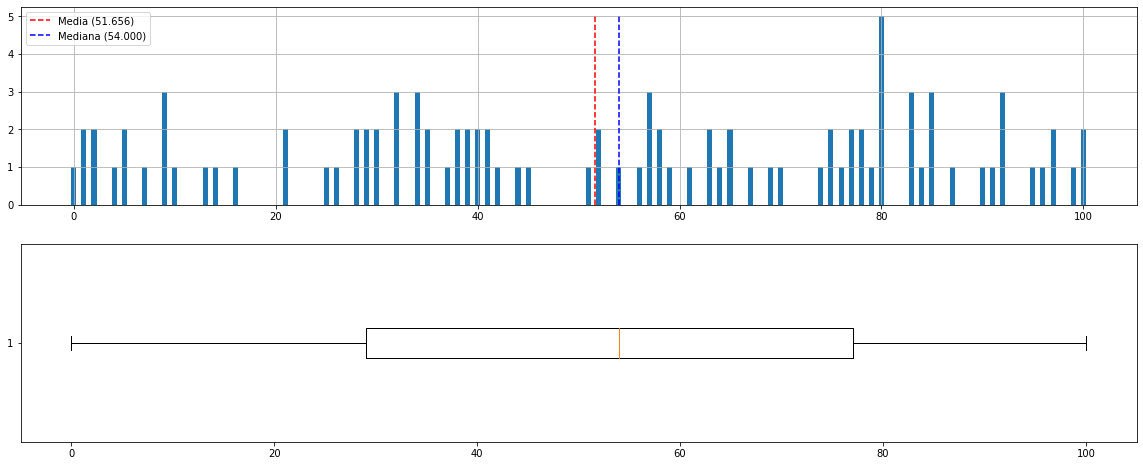

In [7]:
#Graficando la distribución de los datos
graficar_datos(datos=tabla1_f.xi,ni=tabla1_f.ni,ancho=0.5)

In [8]:
#Tipificando los datos
datos1_df['z'] = tipificacion(x=datos1_df.datos, media=datos1_df.datos.mean(), desviacion=datos1_df.datos.std())
datos1_df.head()

,datos,z
0,28,-0.823104
1,80,0.938996
2,78,0.871223
3,67,0.498471
4,25,-0.924764


In [9]:
#Promedio de los datos tipificados
datos1_df.z.mean()

2.2204460492503132e-17

In [10]:
#Desviación estandar de los datos tipificados
datos1_df.z.std()

0.9999999999999998

In [11]:
#Calculando los valores de densidad de los datos
datos1_densidad = pd.Series(datos1_df.datos.apply(funcion_de_densidad, args=(datos1_df.datos,)))
datos1_densidad.head()

0    0.009634
1    0.008699
2    0.009249
3    0.011939
4    0.008815
Name: datos, dtype: float64

<AxesSubplot:xlabel='datos', ylabel='datos'>

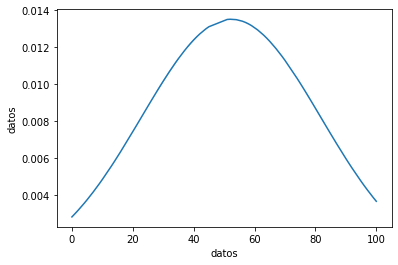

In [12]:
#Se grafica la campana de Gauss para los datos
sns.lineplot(x=datos1_df.datos, y=datos1_densidad)

In [13]:
#Calculando los valores de densidad de los datos z
datosz1_densidad = pd.Series(datos1_df.z.apply(funcion_de_densidad, args=(datos1_df.z,)))
datosz1_densidad.head()

0    0.284310
1    0.256713
2    0.272954
3    0.352334
4    0.260141
Name: z, dtype: float64

<AxesSubplot:xlabel='z', ylabel='z'>

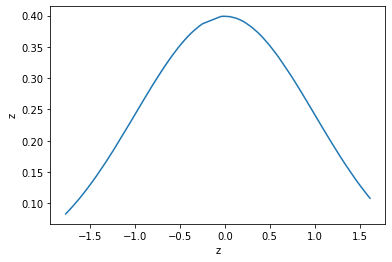

In [14]:
#Se grafica la campana de Gauss para los datos tipificados
sns.lineplot(x=datos1_df.z, y=datosz1_densidad)